## Lab8: Data Encoding

### Student: Juan C. Vecino

### Gruop: Turno 2

### 17/11/2020

### Lab 8.2 Read csv files

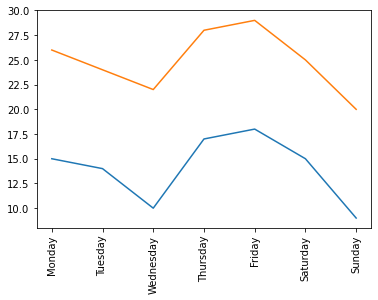

In [2]:
import matplotlib.pyplot as plt
with open('Temperatura.csv','r',encoding='ISO-8859-1') as temperatura:
    header = temperatura.readline().split(',')
    days=[]
    Tmin=[]
    Tmax=[]
    while True:
        lista= temperatura.readline().split(',')
        if lista[0]=='':
            break
        days.append(lista[0])
        Tmin.append(lista[1])
        Tmax.append(lista[2].replace('\n',''))
    v=0
    for i in Tmin:
        Tmin[v]=int(i)
        v+=1
    x=0
    for z in Tmax:
        Tmax[x]=int(z)
        x+=1
plt.xticks(range(7),days,rotation='vertical')
plt.plot(days,Tmin)
plt.plot(days,Tmax)

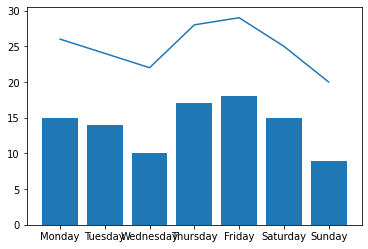

In [88]:
plt.bar(days,Tmin)
plt.plot(days,Tmax)

### Lab 8.3 Read XLS files

In [2]:
def temp_to_c(temp):
    C=(temp - 32)*(5/9)
    return C

In [3]:
import pandas as pd
import datetime

pf = pd.read_excel('North_Dakota.xlsx')
pf["DATE_formated"]=pd.to_datetime(pf["DATE"],format="%Y%m%d")
print(temp_to_c(min(pf["DLY-TMIN-NORMAL"])),temp_to_c(max(pf["DLY-TMAX-NORMAL"])))

-44.44444444444444 429.44444444444446


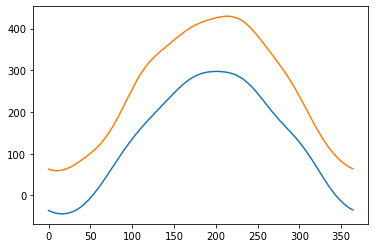

In [27]:
DLY_TMIN_C=[]
DLY_TMAX_C=[]
for i in pf["DLY-TMIN-NORMAL"]:
    DLY_TMIN_C.append(temp_to_c(i))
for i in pf["DLY-TMAX-NORMAL"]:
    DLY_TMAX_C.append(temp_to_c(i))
plt.plot(DLY_TMIN_C)
plt.plot(DLY_TMAX_C)

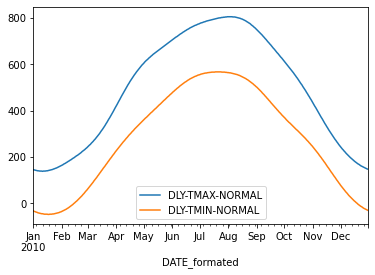

In [74]:
pf.plot(y=["DLY-TMAX-NORMAL","DLY-TMIN-NORMAL"],x="DATE_formated")

### Lab 8.4 Work with API REST (6 pts)

In [86]:
import json
import requests
json_string=requests.get("https://opentdb.com/api.php?amount=10&category=18&difficulty=hard&type=multiple")
json_string.json()

{'response_code': 0,
 'results': [{'category': 'Science: Computers',
   'type': 'multiple',
   'difficulty': 'hard',
   'question': 'What was the name of the security vulnerability found in Bash in 2014?',
   'correct_answer': 'Shellshock',
   'incorrect_answers': ['Heartbleed', 'Bashbug', 'Stagefright']},
  {'category': 'Science: Computers',
   'type': 'multiple',
   'difficulty': 'hard',
   'question': 'The internet domain .fm is the country-code top-level domain for which Pacific Ocean island nation?',
   'correct_answer': 'Micronesia',
   'incorrect_answers': ['Fiji', 'Tuvalu', 'Marshall Islands']},
  {'category': 'Science: Computers',
   'type': 'multiple',
   'difficulty': 'hard',
   'question': 'What port does HTTP run on?',
   'correct_answer': '80',
   'incorrect_answers': ['53', '443', '23']},
  {'category': 'Science: Computers',
   'type': 'multiple',
   'difficulty': 'hard',
   'question': 'Who is the original author of the realtime physics engine called PhysX?',
   'correc

In [6]:
def juego_computer_science():
    n_questions=int(input('Choose a number of questions(1-50):\n'))
    level= input('\nChoose difficulty:\neasy/medium/hard\n')
    category=input('\nChoose a category:\n-Mathematics(19)\nComputer Science(18)\nScience and Nature(7)\nFilms(11)\nVideo Games(15)\n Choose a number:\t')
    return f'https://opentdb.com/api.php?amount={n_questions}&category={category}&difficulty={level}&type=multiple'

In [7]:
def respuesta():
    import time
    inicio=time.time()
    return int(input('\nDime te repsuesta [0-3]:\t')),(time.time()-inicio)

In [10]:
import requests
import json
import random
import numpy as np

r=requests.get(juego_computer_science())
dicc=r.json()
fallado=0
acertado=0
time_average=[]
for i in dicc['results']:
    print(i['question'])
    respuestas=[]
    respuestas.extend(i['incorrect_answers'])
    respuestas.append(i['correct_answer'])
    print('Question: ')
    random.shuffle(respuestas)
    print(respuestas)
    respu,tims= respuesta()
    time_average.append(tims)
    res=respuestas[respu]
    if i['correct_answer']==res:
        print('Has acertado!!!\n')
        acertado+=1
    else:
        print('Has fallado!!!\n')
        fallado+=1
print(f'\nNota final:\n {int((acertado/(acertado+fallado)))*100}%')
print(f'Average time for question: {np.average(time_average):.2f}s')

Choose a number of questions(1-50):
2

Choose difficulty:
easy/medium/hard
easy

Choose a category:
-Mathematics(19)
Computer Science(18)
Science and Nature(7)
Films(11)
Video Games(15)
 Choose a number:	19
The metric prefix &quot;atto-&quot; makes a measurement how much smaller than the base unit?
Question: 
['One Billionth', 'One Quintillionth', 'One Septillionth', 'One Quadrillionth']

Dime te repsuesta [0-3]:	2
Has fallado!!!

How many sides does a trapezium have?
Question: 
['6', '5', '4', '3']

Dime te repsuesta [0-3]:	1
Has fallado!!!


Nota final:
 0%
Average time for question: 1.06s
